<a href="https://colab.research.google.com/github/NightmareXIX/Fruit-and-Vegetable-Detection-using-CNN/blob/main/Training_fruit_vegetable.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Importing libraries

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Data Preprocessing

##Training image preprocessing

In [ ]:
training_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/FruitVegDataset/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 3115 files belonging to 36 classes.


##Validation Image Preprocessing


In [ ]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/FruitVegDataset/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(64, 64),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 351 files belonging to 36 classes.


##Building Model

In [ ]:
cnn = tf.keras.models.Sequential()

##Building Convolution Layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))

In [ ]:
# To avoid overfitting
cnn.add(tf.keras.layers.Dropout(0.5))

In [ ]:
cnn.add(tf.keras.layers.Flatten())

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

In [ ]:
# Output Layer
cnn.add(tf.keras.layers.Dense(units=36,activation='softmax'))

#Compiling and Training Phase

In [ ]:
cnn.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=30)

Epoch 1/30
98/98 [==============================] - 498s 5s/step - loss: 9.4317 - accuracy: 0.0334 - val_loss: 3.4467 - val_accuracy: 0.0684
Epoch 2/30
98/98 [==============================] - 127s 1s/step - loss: 4.1841 - accuracy: 0.0514 - val_loss: 3.3675 - val_accuracy: 0.1083
Epoch 3/30
98/98 [==============================] - 140s 1s/step - loss: 3.5537 - accuracy: 0.0876 - val_loss: 3.1818 - val_accuracy: 0.2023
Epoch 4/30
98/98 [==============================] - 120s 1s/step - loss: 3.5418 - accuracy: 0.1268 - val_loss: 2.9407 - val_accuracy: 0.2593
Epoch 5/30
98/98 [==============================] - 120s 1s/step - loss: 3.4504 - accuracy: 0.1737 - val_loss: 2.7428 - val_accuracy: 0.3105
Epoch 6/30
98/98 [==============================] - 122s 1s/step - loss: 3.3549 - accuracy: 0.2289 - val_loss: 2.3921 - val_accuracy: 0.4188
Epoch 7/30
98/98 [==============================] - 120s 1s/step - loss: 3.2327 - accuracy: 0.2934 - val_loss: 2.5441 - val_accuracy: 0.3960
Epoch 8/30
98

##Saving Model

In [ ]:
cnn.save('trained_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# Return dictionary of training history
training_history.history

{'loss': [9.431747436523438,
  4.184119701385498,
  3.5537240505218506,
  3.541832685470581,
  3.4503533840179443,
  3.3549325466156006,
  3.232743501663208,
  2.9750795364379883,
  2.7008752822875977,
  2.396765947341919,
  2.5348846912384033,
  1.9234097003936768,
  1.8515101671218872,
  1.9039409160614014,
  1.7259180545806885,
  1.5475677251815796,
  1.366898775100708,
  1.4048542976379395,
  1.377078652381897,
  1.3637436628341675,
  1.199216365814209,
  1.3318071365356445,
  1.0556007623672485,
  1.1447687149047852,
  1.0698083639144897,
  1.1286169290542603,
  0.9873809218406677,
  0.9569141268730164,
  0.8786802291870117,
  0.8444520831108093],
 'accuracy': [0.03338683769106865,
  0.051364365965127945,
  0.08764044940471649,
  0.12680578231811523,
  0.1736757606267929,
  0.2288924604654312,
  0.2934189438819885,
  0.3653290569782257,
  0.39582663774490356,
  0.44044944643974304,
  0.49502408504486084,
  0.545746386051178,
  0.5656501054763794,
  0.6041733622550964,
  0.63884431

In [ ]:
# Recording history in json
import json
with open('training_hist.json','w') as f:
  json.dump(training_history.history,f)

In [ ]:
print(training_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


##Calculating Accuracy of Model Achieved on Validation Set

In [ ]:
# Final validation accuracy of trained model
print("Validation set Accuracy: {} %".format(training_history.history['val_accuracy'][-1]*100))

Validation set Accuracy: 93.4472918510437 %


#Accuracy Visualization

##Training Visualization

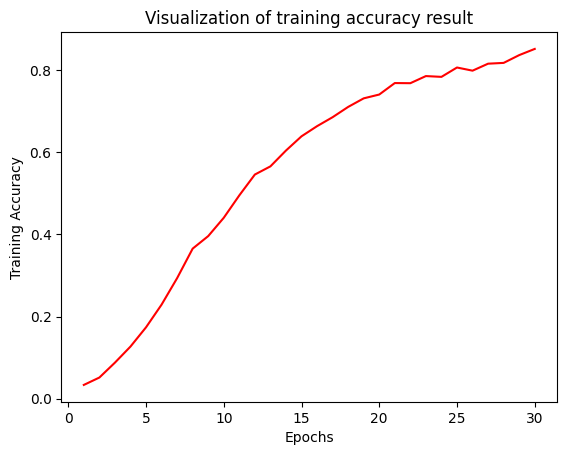

In [ ]:
epochs = [i for i in range(1,31)]
plt.plot(epochs,training_history.history['accuracy'],color='red')
plt.xlabel('Epochs')
plt.ylabel('Training Accuracy')
plt.title('Visualization of training accuracy result')
plt.show()

##Validation Visualization

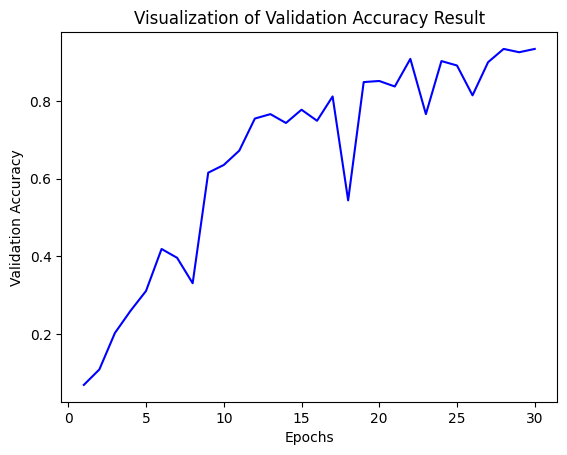

In [ ]:
plt.plot(epochs,training_history.history['val_accuracy'],color='blue')
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Visualization of Validation Accuracy Result')
plt.show()